# LAB 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1
Write a function to perform lincon(h; x) to convolve two input sequences using the expression for liner convolution

In [2]:
# handmade method to convolve two sequences
def linconv(x,h):
  len_x = len(x)
  len_h = len(h)

  if len_x < len_h:
    x , h = h , x
    len_x, len_h = len_h, len_x 

  x_ = np.pad(np.asarray(x), (len_h-1,len_h-1))
  l = len_h + len_x - 1
  h_ = np.asarray(h[::-1])
  y = []
  for i in range(l):
    assert len(x_[i:i+len_h]) == len(h_) , print(f"x: {len(x_[i:i+len_h])} || h: {len(h_)}")
    y.append(np.sum(np.dot(h_,x_[i:i+len_h])))

  return np.asarray(y)

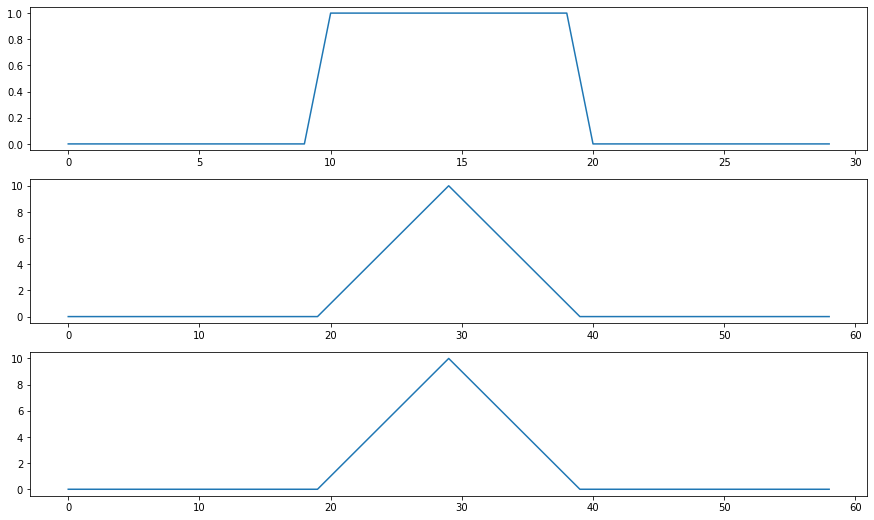

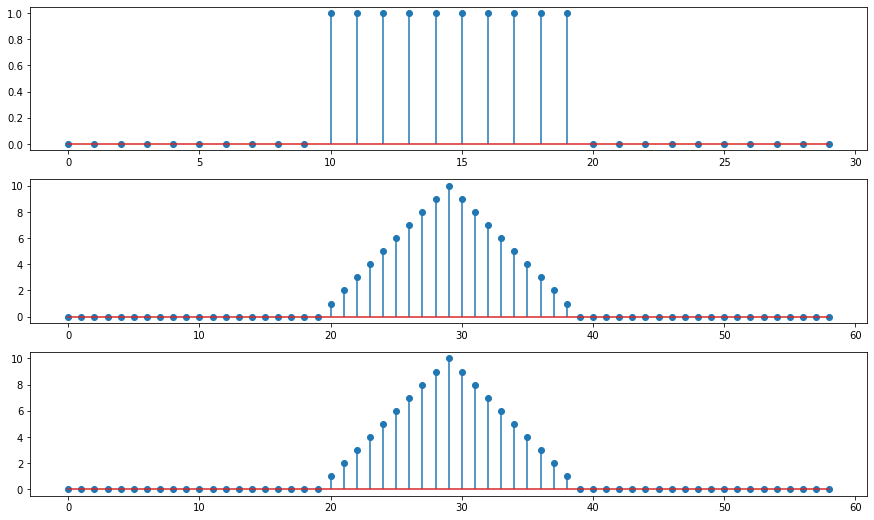

In [3]:
h = np.pad(np.ones(10),(10,10))
x = np.pad(np.ones(10),(10,10))

# print(np.convolve(x,h))
# print(linconv(x,h))

plt.figure(figsize=(15,9))
plt.subplot(311)
plt.plot(h)
plt.subplot(312)
plt.plot(np.convolve(h,x))
plt.subplot(313)
plt.plot(linconv(h,x))
plt.show()

plt.figure(figsize=(15,9))
plt.subplot(311)
plt.stem(h)
plt.subplot(312)
plt.stem(np.convolve(h,x))
plt.subplot(313)
plt.stem(linconv(h,x))
plt.show()

## Question 2

Write another function freqconv(h; x) to perform the linear convolution of convolve h and x using
their ffts.

In [4]:
def freqconv(h,x):

  x = np.asarray(x)
  h = np.asarray(h)
  n = len(x) + len(h) -1

  X = np.fft.fft(x,n)
  H = np.fft.fft(h,n)

  y = abs(np.fft.ifft(X*H))
  return np.asarray(y)

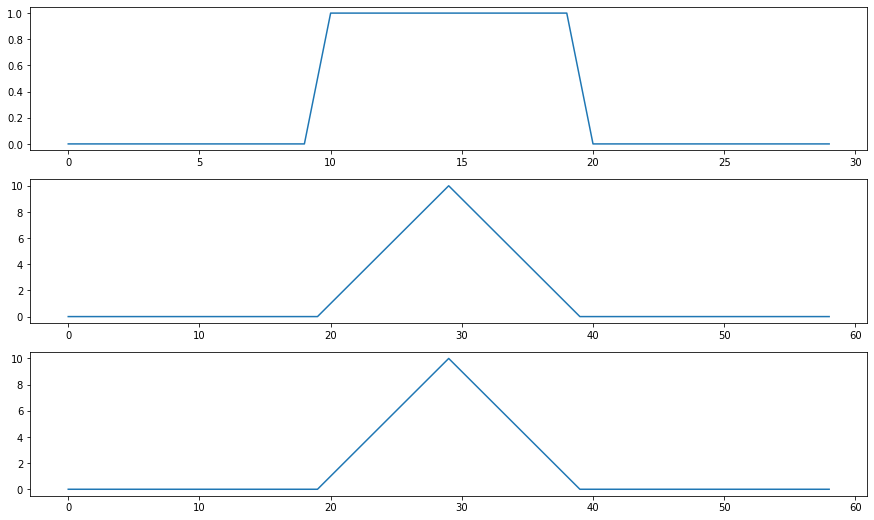

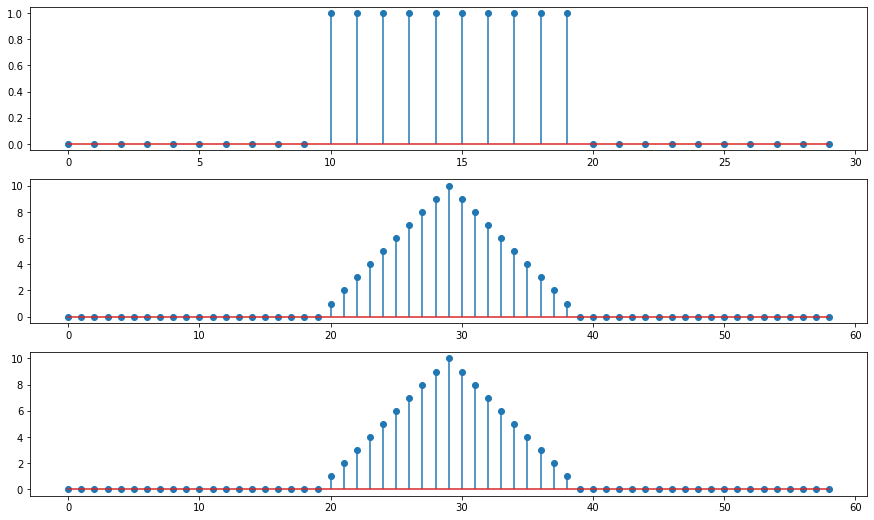

In [5]:
# print(np.convolve(h,x))
# print(freqconv(h,x))
# print((np.convolve(h,x) - freqconv(h,x)).sum())

plt.figure(figsize=(15,9))
plt.subplot(311)
plt.plot(h)
plt.subplot(312)
plt.plot(freqconv(h,x))
plt.subplot(313)
plt.plot(linconv(h,x))
plt.show()

plt.figure(figsize=(15,9))
plt.subplot(311)
plt.stem(h)
plt.subplot(312)
plt.stem(freqconv(h,x))
plt.subplot(313)
plt.stem(linconv(h,x))
plt.show()

## Question 3
Write a function to generate 1000 samples of a periodic train of pulses, with a period T, specified by the user.

In [6]:
def pulse_train(T):
  assert T >= 1, "period should be greater than 1"
  pulse = np.pad(np.ones(1),(T-1,0))
  pulse_t = []
  for i in range(1000):
    pulse_t = np.concatenate((pulse_t,pulse))
  return pulse_t

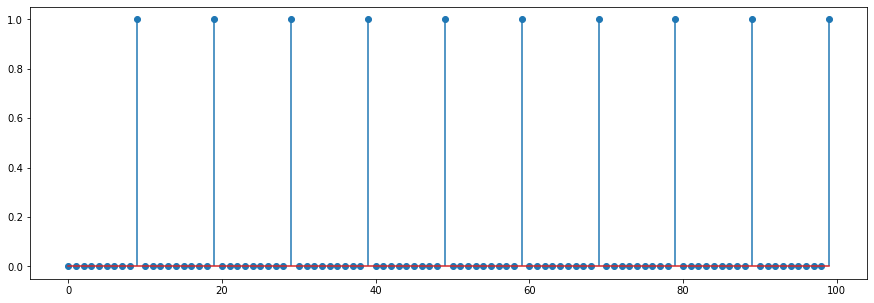

In [7]:
a = pulse_train(10)

plt.figure(figsize=(15,5))
plt.stem(a[:100])
plt.show()

## Question 4
Define a vector h = [1; 2; 3; 4] and convolve it with the a pulse train with periods T=1,2,3 and 4, what do you observe?

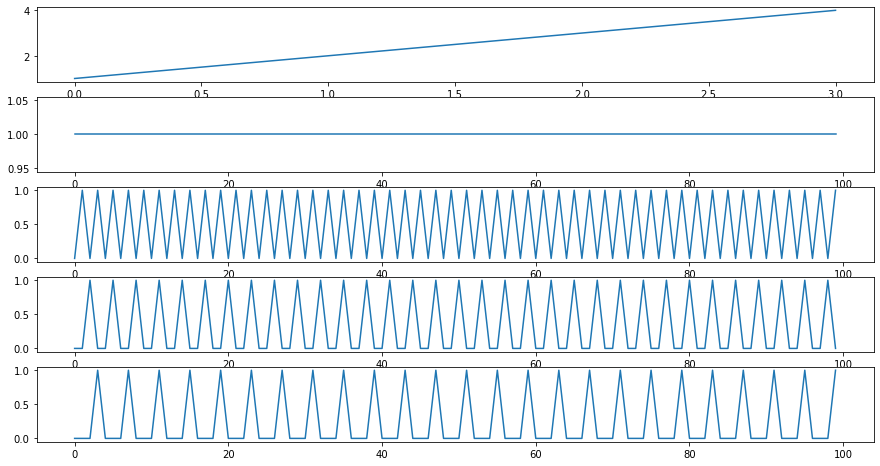

In [8]:
h = [1,2,3,4]

t_1 = pulse_train(1)
t_2 = pulse_train(2)
t_3 = pulse_train(3)
t_4 = pulse_train(4)

plt.figure(figsize=(15,8))
plt.subplot(511)
plt.plot(h)

plt.subplot(512)
plt.plot(t_1[:100])

plt.subplot(513)
plt.plot(t_2[:100])

plt.subplot(514)
plt.plot(t_3[:100])

plt.subplot(515)
plt.plot(t_4[:100])

plt.show()

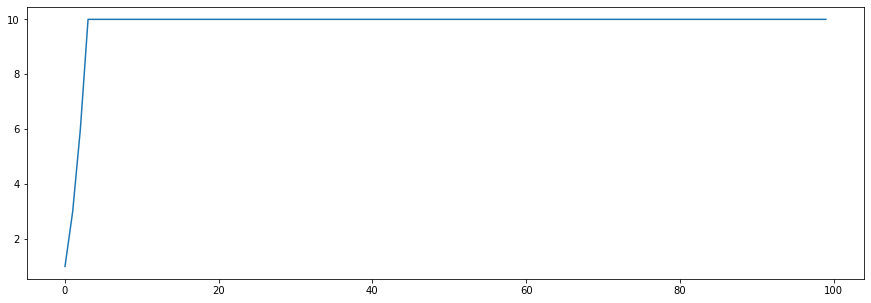

In [9]:
plt.figure(figsize=(15,5))
plt.plot(freqconv(h,t_1)[:100])
plt.show()

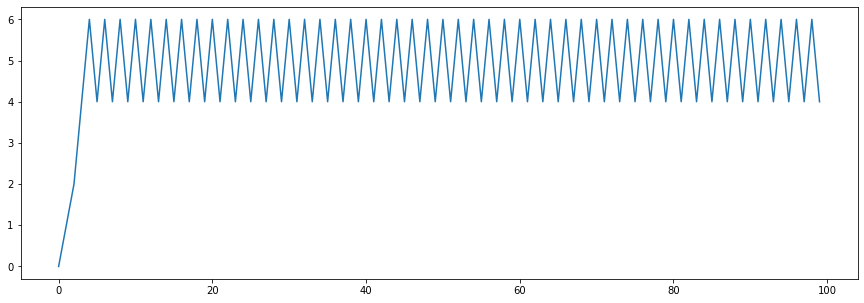

In [10]:
plt.figure(figsize=(15,5))
plt.plot(freqconv(h,t_2)[:100])
plt.show()

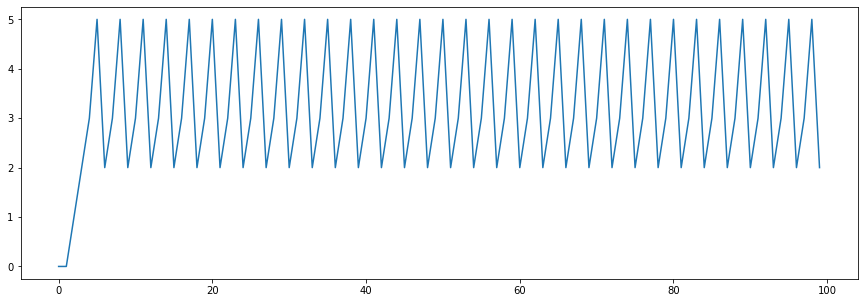

In [11]:
plt.figure(figsize=(15,5))
plt.plot(freqconv(h,t_3)[:100])
plt.show()

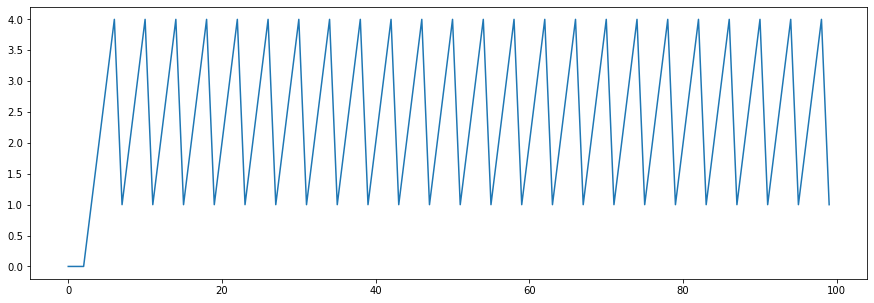

In [12]:
plt.figure(figsize=(15,5))
plt.plot(freqconv(h,t_4)[:100])
plt.show()

## Question 5

Sample your voice at 8kHz for 2 seconds and pass it through an arbitrary, length 16 FIR filter using
1. Direct Linear convolution
2. Linear Convolution using FFT
3. The overlap-add method for block lengths: 64, 128, 256 and 512
4. The overlap save method for block length: 64, 128, 256, and 512

In each of the above cases, obtain the total number of required real multiplications, and using that as an indication of computational complexity, comment on the optimal block size for overlap add and overlap save implementation of linear convolution.

In [13]:
import scipy
import scipy.signal as signal
from scipy.io import wavfile

In [14]:
rate, data = wavfile.read("sound_file_lab_2.wav")

print(rate)

48000


In [15]:
ch0_dt = data[:,0]
len(ch0_dt)

310272

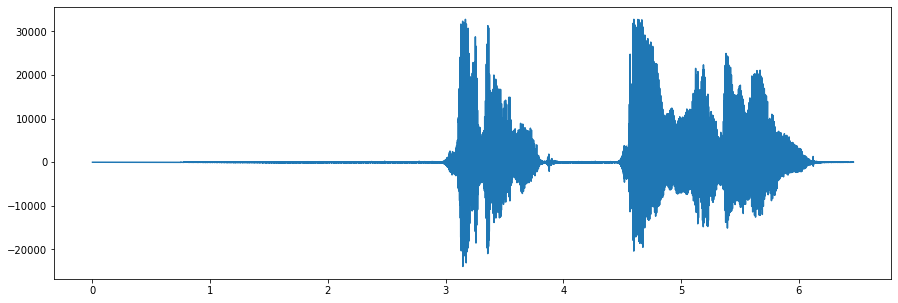

In [16]:
x = np.arange(0,(len(ch0_dt)/rate) ,1/rate)

plt.figure(figsize=(15,5))
plt.plot(x[:-1], ch0_dt, )
plt.show()

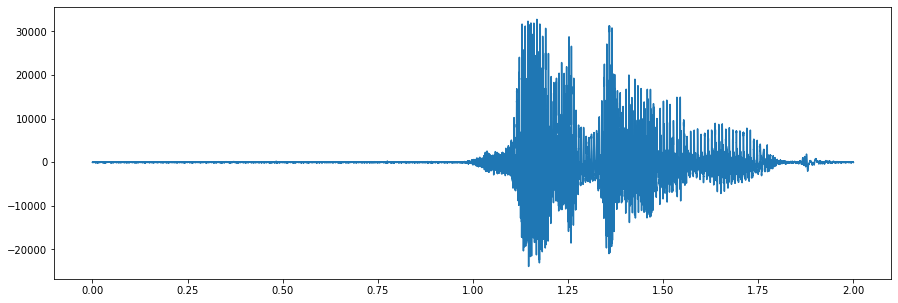

In [17]:
x_cropped = x[0*rate:2*rate]
wave = ch0_dt[2*rate:4*rate]

plt.figure(figsize=(15,5))
plt.plot(x_cropped, wave)
plt.show()

Sampling rate is: 6
Original samples: 96000
Resampled wave: 16000


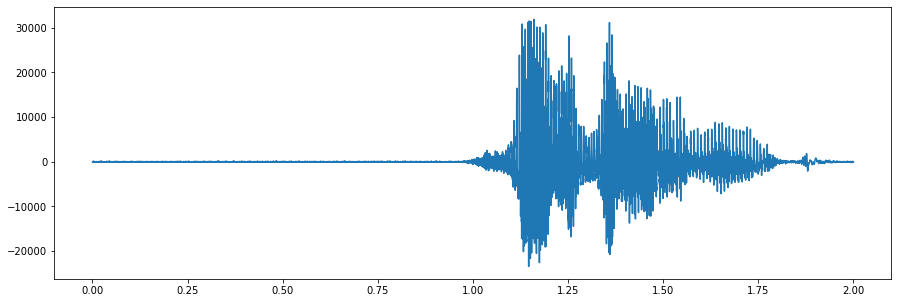

In [18]:
# Resampling at 8 KHz
sample_rate = rate//8000

x_resampled = x_cropped[::sample_rate]
wave_resampled = wave[::sample_rate]

print(f"Sampling rate is: {sample_rate}")
print(f"Original samples: {len(wave)}")
print(f"Resampled wave: {len(wave_resampled)}")

plt.figure(figsize=(15,5))
plt.plot(x_resampled, wave_resampled)
plt.show()


In [19]:
# Using a premade function from Scipy Cookbook
def mfreqz(b,a=1):

    w,h = signal.freqz(b,a)
    h_dB = 20 * np.log10 (abs(h))

    plt.figure(figsize=(15,10))

    plt.subplot(211)
    plt.plot(w/np.pi,h_dB)
    plt.ylim(-150, 5)
    plt.ylabel('Magnitude (db)')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Frequency response')

    plt.subplot(212)
    h_Phase = np.unwrap(np.angle(h))
    plt.plot(w/np.pi,h_Phase)
    plt.ylabel('Phase (radians)')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Phase response')
    plt.subplots_adjust(hspace=0.5)
    
    plt.show()

[ 0.00238801 -0.00091261 -0.01190975 -0.02494092 -0.00832196  0.06895379
  0.19015875  0.28458469  0.28458469  0.19015875  0.06895379 -0.00832196
 -0.02494092 -0.01190975 -0.00091261  0.00238801]


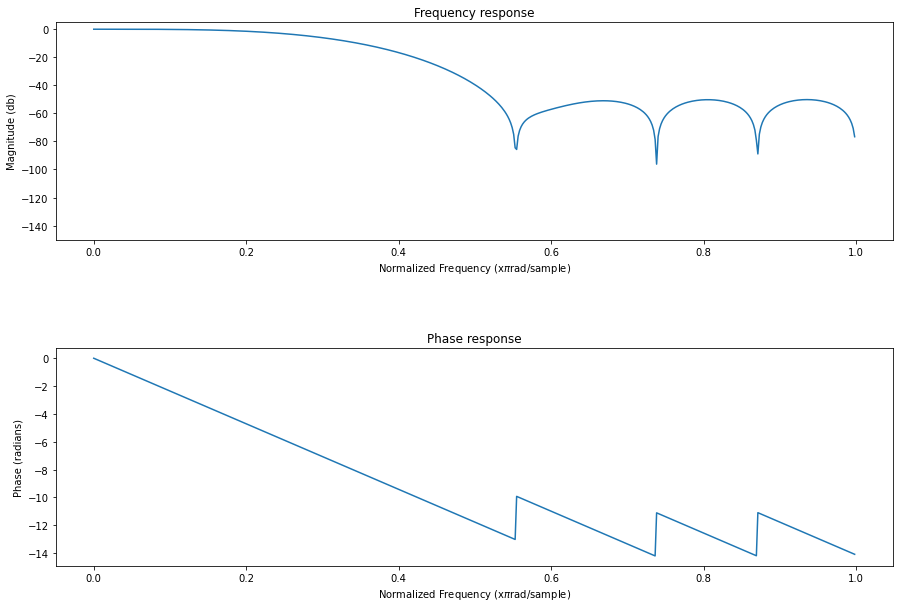

In [20]:
# 16 tap filter
n = 16
a = signal.firwin(n, cutoff = 0.3, window = "hamming")
print(a)
mfreqz(a)

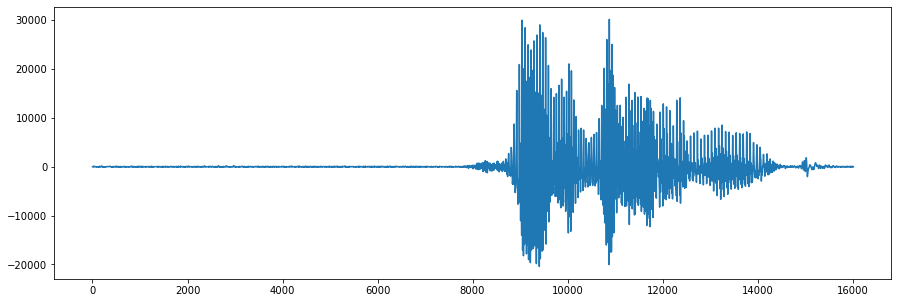

In [21]:
wave_fil_direct = linconv(wave_resampled, a)

plt.figure(figsize=(15,5))
plt.plot(wave_fil_direct)
plt.show()

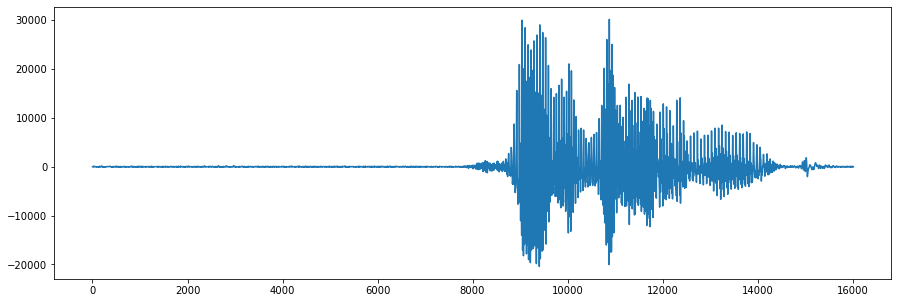

In [22]:
wave_fil_fft = freqconv(wave_resampled, a)

plt.figure(figsize=(15,5))
plt.plot(wave_fil_direct)
plt.show()

In [23]:
def overlap_add(x, h, n):
  m = len(h)
  nx = len(x)
 
  step_size = n-(m-1)
  H = np.fft.fft(h,n)
  pos = 0

  y = np.zeros(nx+m-1, dtype=np.complex128)
  while pos+step_size <= nx:
    y[pos:pos+n] += np.fft.ifft(np.fft.fft(x[pos:pos+step_size],n)*H)
    pos+=step_size
  return y

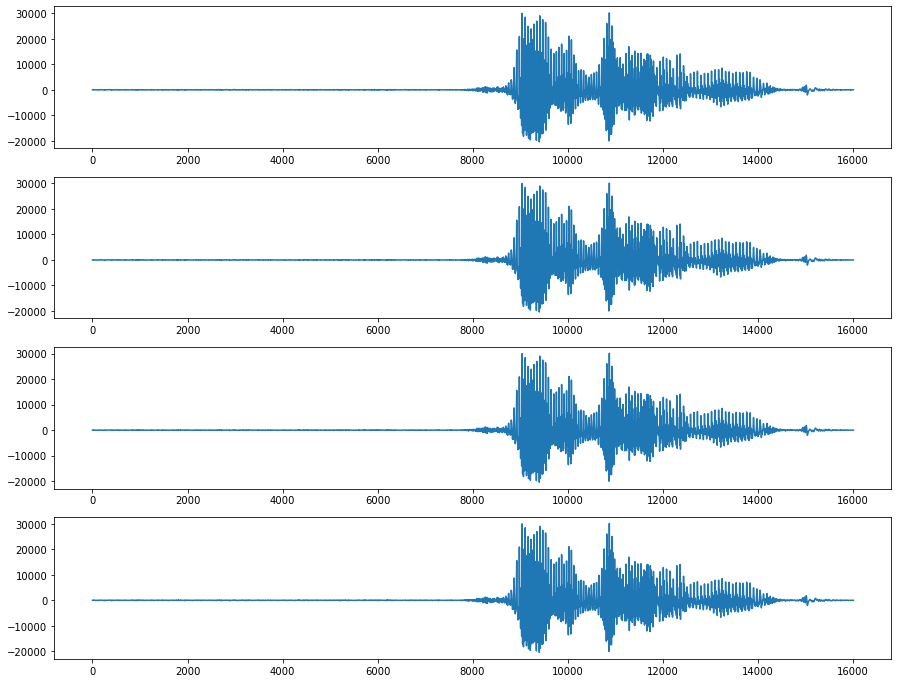

In [24]:
wave_fil_oa_64 = overlap_add(wave_resampled, a , 64)
wave_fil_oa_128 = overlap_add(wave_resampled, a , 128)
wave_fil_oa_256 = overlap_add(wave_resampled, a , 256)
wave_fil_oa_512 = overlap_add(wave_resampled, a , 512)

plt.figure(figsize=(15,12))

plt.subplot(411)
plt.plot(np.real(wave_fil_oa_64))

plt.subplot(412)
plt.plot(np.real(wave_fil_oa_128))

plt.subplot(413)
plt.plot(np.real(wave_fil_oa_256))

plt.subplot(414)
plt.plot(np.real(wave_fil_oa_512))

plt.show()

In [25]:
def overlap_save(x,h,n):
  m = len(h)
  overlap = m-1
  step_size = n-overlap
  H = np.fft.fft(h,n)

  pos=0
  y = np.zeros(len(x)+m-1, dtype=np.complex128)
 
  while pos+n <= len(x):
    yt = np.fft.ifft(np.fft.fft(x[pos:pos+n])*H)
    y[pos:pos+step_size] = yt[m-1:n]
    pos += step_size
  return y

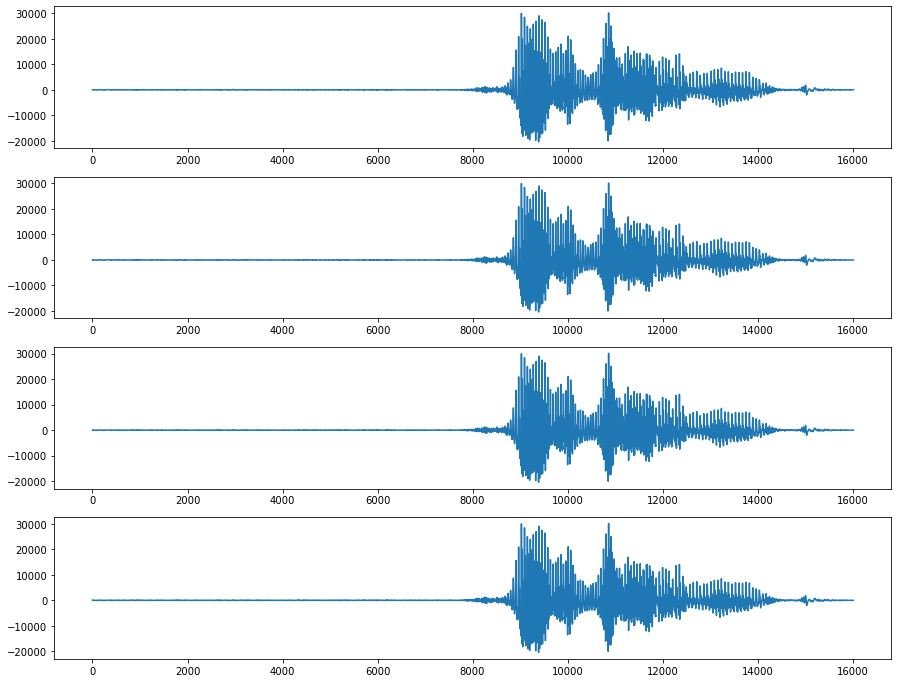

In [27]:
wave_fil_os_64 = overlap_save(wave_resampled, a, 64)
wave_fil_os_128 = overlap_save(wave_resampled, a, 128)
wave_fil_os_256 = overlap_save(wave_resampled, a, 256)
wave_fil_os_512= overlap_save(wave_resampled, a, 512)

plt.figure(figsize=(15,12))

plt.subplot(411)
plt.plot(np.real(wave_fil_os_64))

plt.subplot(412)
plt.plot(np.real(wave_fil_os_128))

plt.subplot(413)
plt.plot(np.real(wave_fil_os_256))

plt.subplot(414)
plt.plot(np.real(wave_fil_os_512))

plt.show()

## Question 6
Write a function myquant(x,L) to quantize the input vector into L uniformly spaced intervals.

In [27]:
x = np.random.rand(100)*100

In [28]:
def myquant(x,L, mode='avg'):
  x =  np.asarray(x, dtype=np.float32)
  min_x = min(x)
  max_x = max(x)
  
  lvls = np.linspace(min_x,max_x,num=L)
  y = []

  for val in x:
    i = np.argmax(val <= lvls)
    
    if mode == 'avg': 
      y.append(((lvls[i]+lvls[i-1])/2) if i>0 else min_x)
    elif mode == 'min':
      y.append(lvls[i-1] if i>0 else min_x)

  return {"levels":lvls, "output":y}

In [29]:
out = myquant(x,10, mode='avg')

In [30]:
print(out['levels'])

[3.18692029e-02 1.10083315e+01 2.19847939e+01 3.29612562e+01
 4.39377185e+01 5.49141809e+01 6.58906432e+01 7.68671055e+01
 8.78435679e+01 9.88200302e+01]


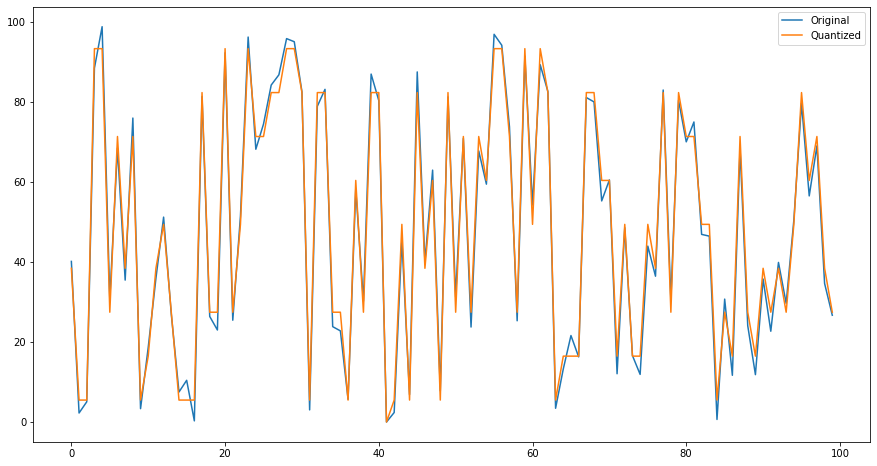

In [31]:
plt.figure(figsize=(15,6))
plt.plot(x, label='Original')
plt.plot(out['output'], label='Quantized')
plt.legend()
plt.show()

In [32]:
print(max(x-out['output']))

5.488233217779552


## Question 7
Use the mean squared error function defined in the previous lab sheet to plot the quantization mean squared error as a function of L. Write down your observations.

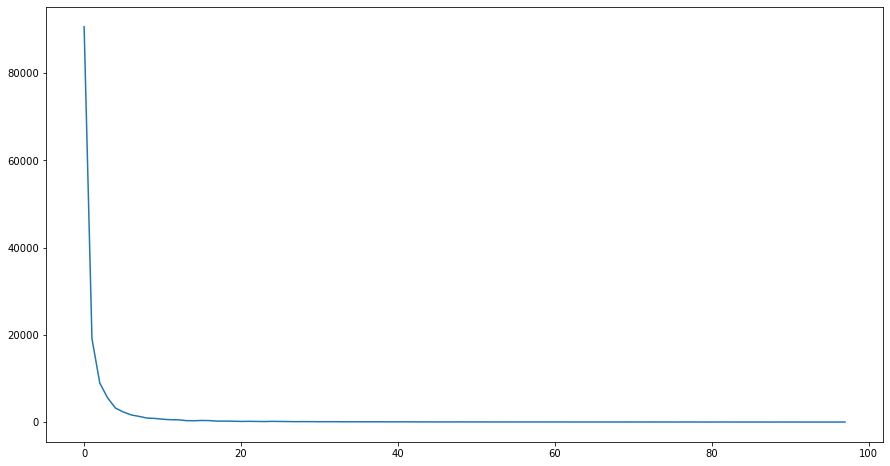

In [33]:
mse_list = []
for l in range(2,len(x)):
  out = myquant(x, l)
  error = x-out["output"]
  mse = np.mean(np.sum([ i**2 for i in error ]))
  mse_list.append(mse)


plt.figure(figsize=(15,6))
plt.plot(mse_list)
plt.show()

## Question 8
Take a five second audio sample of your choice and pass it through the quantizer designed in
Question 6. Observe the effect of mean squared quantization error on the perceptual quality of the
audio sample.

In [34]:
import scipy
from scipy.io import wavfile

In [35]:
rate, data = wavfile.read("sound_file_lab_2.wav")
print(rate)

48000


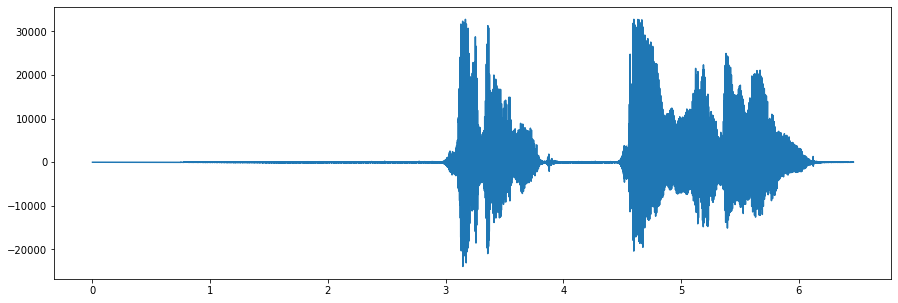

In [36]:
ch0 = data[:,0]
x = np.arange(0,len(ch0)/rate,1/rate)

plt.figure(figsize=(15,5))
plt.plot(x[:-1],ch0)
plt.show()

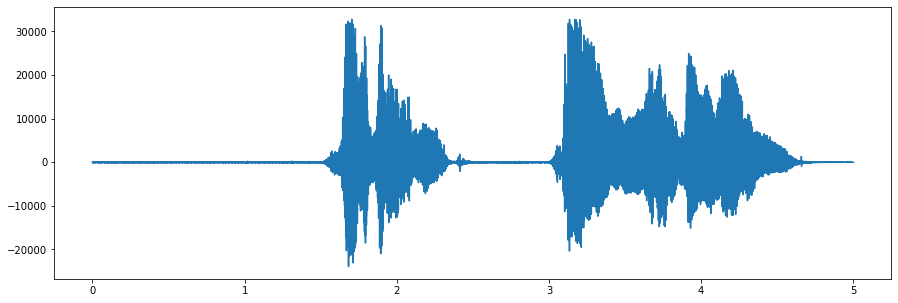

In [37]:
wave = ch0[int(1.464*rate):]
x = x[0:len(wave)]

plt.figure(figsize=(15,5))
plt.plot(x,wave)
plt.show()

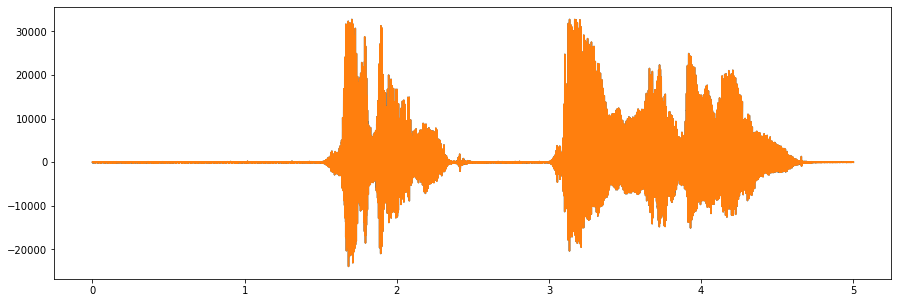

In [38]:
out = myquant(wave, 1000)
y = out['output']

plt.figure(figsize=(15,5))
plt.plot(x,wave)
plt.plot(x,y)
plt.show()

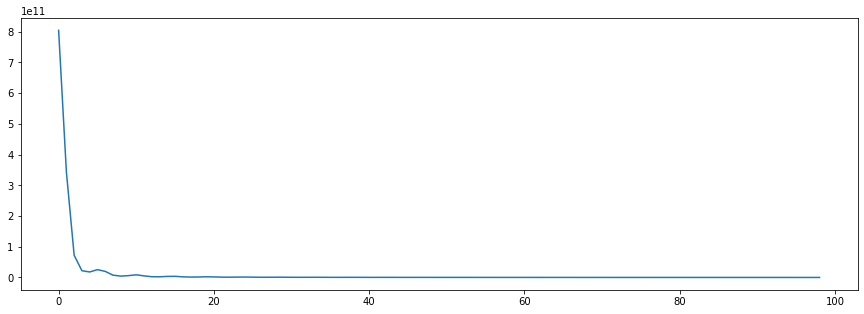

In [39]:
mse_list = []
quant_lvls = [10*i for i in range(1,100)]
for l in quant_lvls:
  out = myquant(wave, l)
  error = wave-out["output"]
  mse = np.mean(np.sum([ i**2 for i in error ]))
  mse_list.append(mse)


plt.figure(figsize=(15,5))
plt.plot(mse_list)
plt.show()

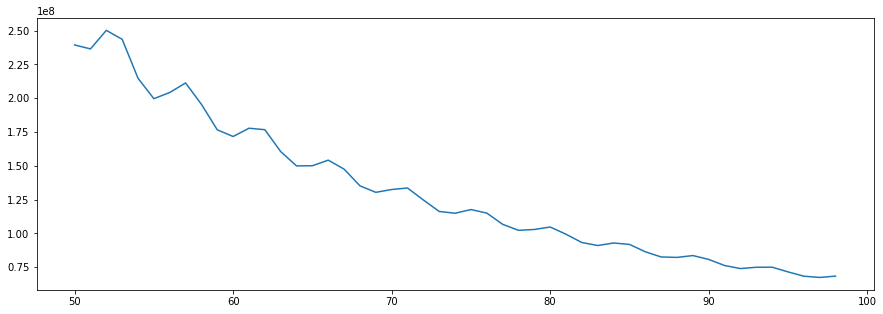

In [40]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(50,99),mse_list[-50:-1])
plt.show()

In [41]:
print(f"MSQE for L=1000 is {mse_list[-1]:e}")

MSQE for L=1000 is 6.699953e+07


## Question 9
Modify the function myquant(x,L) to lev quant(x,v) that takes another vector v as an input and quantizes the points in x around the points in v according to the nearest neighbors approach.

In [42]:
x = np.random.rand(100)*100

In [43]:
def lev_quant(x,v):
  y = []
  v = np.sort(np.asarray(v))
  for xi in x:
    i = np.argmax(v >= xi)
    upper_err = v[i]-xi if v[i]>xi else 0
    lower_err = xi - v[i-1] if i>0 else 0 
    upper = v[i] if v[i]>xi else v[-1]
    lower = v[i-1] if i>0 else v[0]

    if upper_err > lower_err:
      y.append(lower)
    else:
      y.append(upper)

  return np.asarray(y)

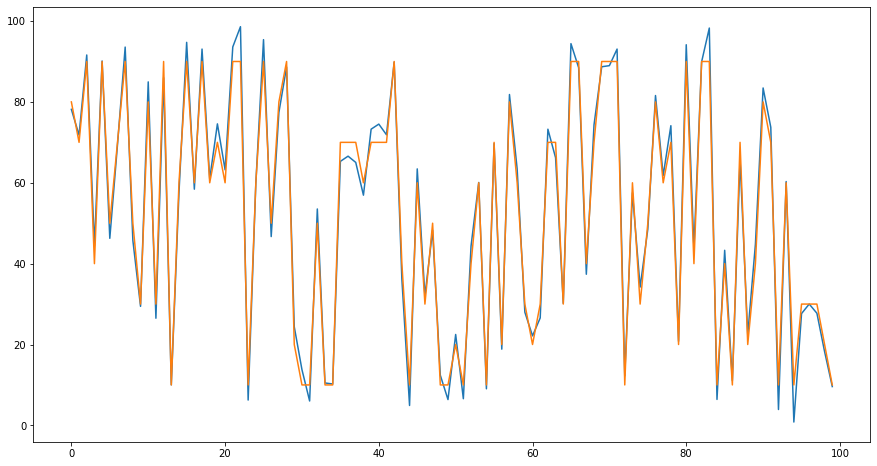

In [44]:
v_example = [10,20,30,40,50,60,70,80,90]
y = lev_quant(x,v_example)

plt.figure(figsize=(15,6))
plt.plot(x,label="Original")
plt.plot(y,label="Quantized")
plt.show()

## Question 10
Extend lev quant(x,v) to handle complex numbers. Write down the changes that you needed to consider in the notebook.

In [45]:
def lev_quant_complex(x,v):
  y = []
  v = np.sort_complex(np.asarray(v))      # function changed to sort complex values
  for xi_ in x:
    xi = abs(xi_)                        # Taking absolute value of x
    i = np.argmax(v >= xi)
    upper_err = abs(v[i])-xi if abs(v[i])>xi else 0  #comparing absolute values
    lower_err = xi - abs(v[i-1]) if i>0 else 0       #comparing absolute values
    upper = v[i] if abs(v[i])>xi else v[-1]          #comparing absolute values
    lower = v[i-1] if i>0 else v[0]

    if upper_err > lower_err:
      y.append(lower)
    else:
      y.append(upper)

  return np.asarray(y)

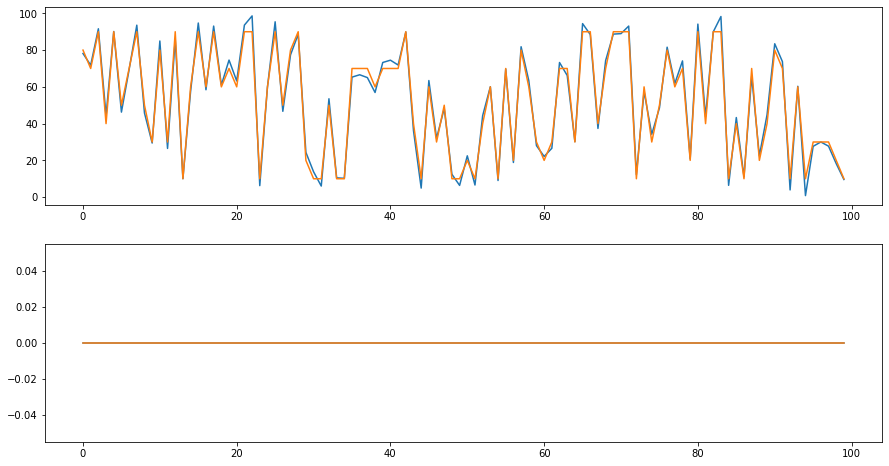

In [46]:
v_example = [10,20,30,40,50,60,70,80,90]
y = lev_quant_complex(x,v_example)

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(np.real(x),label="Original Real")
plt.plot(np.real(y),label="Quantized Real")
plt.subplot(212)
plt.plot(np.imag(x),label="Original Real")
plt.plot(np.imag(y),label="Quantized Real")
plt.show()

## Question 11
Use the function myquant(x,L) to plot the histogram of the input vector using only the for loop and the if statement.

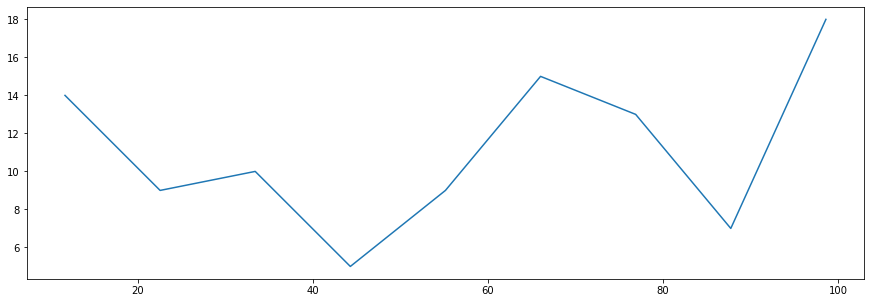

In [47]:
out = myquant(x, 10, mode='avg')

lvls = out['levels']
y = out['output']

bins = np.zeros(len(lvls)-1)

for yi in y:
  for i in range(len(lvls)):
    if yi < lvls[i]:
      bins[i-1]+=1
      break

plt.figure(figsize=(15,5))
plt.plot(lvls[1:], bins)
plt.show()

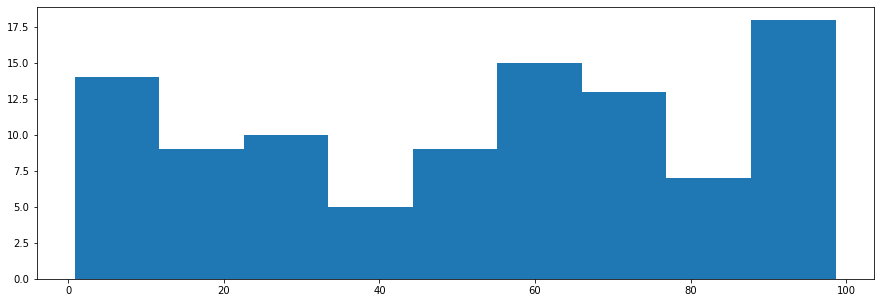

In [48]:
plt.figure(figsize=(15,5))
plt.hist(y, bins=lvls)
plt.show()

## Question 12
Implement the K-means vector quantization algorithm for an arbitrary set of input vectors.


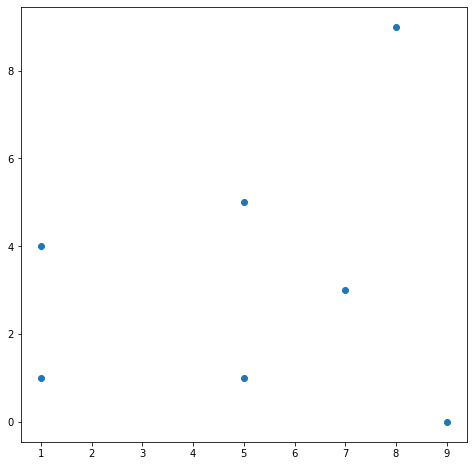

In [49]:
#example dataset
data = [
        [1,4],
        [5,1],
        [5,5],
        [7,3],
        [8,9],
        [1,1],
        [9,0],
]

# data= [[1, 2],
#               [1.5, 1.8],
#               [5, 8 ],
#               [8, 8],
#               [1, 0.6],
#               [9,11]]

data = np.asarray(data)

plt.figure(figsize=(8,8))
plt.scatter(data[:,0], data[:,1])

In [50]:
class K_Means():

  def __init__(self, k=2, tol=0.001, max_iter=300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter
  
  def fit(self, data):
    
    self.centroids = {}

    for i in range(self.k):
      self.centroids[i] = data[i]

    

    for itr in range(self.max_iter):
      self.clfs = {}

      #init step
      for i in range(self.k):
        self.clfs[i] = []

      #classification step
      for datum in data:
        dist = [np.linalg.norm(datum - self.centroids[centroid]) for centroid in self.centroids]
        ind = np.argmin(dist)
        self.clfs[ind].append(datum)

      prev_cents = dict(self.centroids)

      #update step
      for clf in self.clfs:
        self.centroids[clf] = np.average(self.clfs[clf], axis=0)

      #tolerance check
      flag = True

      for i in range(self.k):
        og_cent = prev_cents[i]
        curr_cent  = self.centroids[i]
        change = np.sum((curr_cent - og_cent)/(og_cent*100.))
        if change>self.tol:
          flag=False
          
      if flag:
        break

  def predict(self, data):
    dist = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
    clf = np.argmin(dist,axis=0)
    return clf

In [51]:
clf = K_Means()
clf.fit(data)

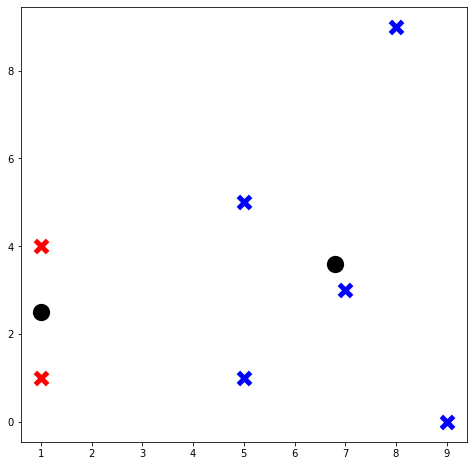

In [52]:
colors = ['r','b','g','o','y']

plt.figure(figsize=(8,8))

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.clfs:
    color = colors[classification]
    for featureset in clf.clfs[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
# unk_data= [[1, 2],
#               [1.5, 1.8],
#               [5, 8 ],
#               [8, 8],
#               [1, 0.6],
#               [9,11]]
      
# unk_data = np.asarray(unk_data)

# for unknown in unk_data:
#     classification = clf.predict(unknown)
#     plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()

In [53]:
clf.clfs

{0: [array([1, 4]), array([1, 1])],
 1: [array([5, 1]),
  array([5, 5]),
  array([7, 3]),
  array([8, 9]),
  array([9, 0])]}

In [54]:
clf.centroids

{0: array([1. , 2.5]), 1: array([6.8, 3.6])}